## Importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
#!{sys.executable} -m pip install folium --user
#!pip install geopy
from geopy.geocoders import Nominatim
#!pip install folium

#!conda install -c conda-forge folium
import folium
from folium.plugins import MarkerCluster



## Reading in data

In [3]:
TanzaniaMobMon = pd.read_csv('/home/faith/Downloads/training.csv')
TanzaniaMobMon.columns
TanzaniaMobMon.head(5)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


## 1. Examining the dataset. 

In [4]:
#1.1 Get the column names
column_names = TanzaniaMobMon.columns
print('The column themes are as follows:', column_names)

The column themes are as follows: Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')


In [26]:
#1.2 Renaming Columns
TanzaniaMobMon.rename(columns = {
    'Q1':'Age',
    'Q2':'Gender',
    'Q3':'Marital status',
    'Q4':'Highest level of education completed',
    'Q5':'Form of land ownership',
    'Q6':'Land Onwership',
    'Q7':'Mobile phone ownership',
    'Q8_1':'Salaries/wages',
    'Q8_2':'Money from trading/selling',
    'Q8_3':'Money from providing a service',
    'Q8_4':'Occasional Jobs',
    'Q8_5':'Rental income', 
    'Q8_6':'Interest from savings, investments',
    'Q8_7':'Pension', 
    'Q8_8':'Social welfare money', 
    'Q8_9':'Rely on someone else to send money',
    'Q8_10':'Someone else pays expenses', 
    'Q8_11':'Other',
    'Q16': 'Mobile money usage'
   }, inplace = True)
print('The column themes are as follows:', TanzaniaMobMon.columns)

The column themes are as follows: Index(['ID', 'Age', 'Gender', 'Marital status',
       'Highest level of education completed', 'Form of land ownership',
       'Land Onwership', 'Mobile phone ownership', 'Salaries/wages',
       'Money from trading/selling', 'Money from providing a service',
       'Occasional Jobs', 'Rental income',
       'Interest from savings, investments', 'Pension', 'Social welfare money',
       'Rely on someone else to send money', 'Someone else pays expenses',
       'Other', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Mobile money usage', 'Q17', 'Q18', 'Q19', 'Latitude', 'Longitude',
       'mobile_money', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification', 'Age by decades'],
      dtype='object')


In [31]:
#1.3 Renaming indexes
clean_up = {'Gender':    
{    1:'Male', 
    2:'Female'
},

'Marital status': 
{   1:'Married',
    2:'Divorced',
    3:'Widowed',
    4:'Single/never married'
},

'Highest level of education completed':
{   1:'No formal education',
    2:'Some primary',
    3:'Primary completed',
    4:'Post primary technical training',
    5:'Some secondary',
    6:'University or other higher education',
    7: 'Don’t know'
},

'Form of land ownership':
{   1:'Personally owns land',
    2:'Owns land with someone els',
    3:'Household member owns land',
    4:'land is rented',
    5:'Dont own land',
    6:'Dont know'
   
},            
            
'Land Onwership':
{   1:'Yes',
    2:'No'
   
},

'Mobile phone ownership':
{   1:'Yes',
    2:'No'
       
},

'mobile_money_classification' :
{   0:'No mobile money or other financial service',
    1:'One other finacial service',
    2:'Mobile money only',
    3:'Mobile money and other financial service'
},
            
 'Mobile money usage':
{   -1:'not apllicable',
    1:'Yesterday/today',
    2:'In the past 7 days',
    3:'In the past 30 days',
    4:'In the past 90 days',
    5:' More than 90 days ago but less than 6 months ago',
    6:' 6 months or longer ago'
}
           }

TanzaniaMobMon.replace(clean_up, inplace=True)


In [7]:
#1.4 Get the column data types
column_types = TanzaniaMobMon.dtypes
print("The theme data types are as follows:",column_types)

The theme data types are as follows: ID                                        int64
Age                                       int64
Gender                                   object
Marital status                           object
Highest level of education completed     object
Form of land ownership                   object
Land Onwership                           object
Mobile phone ownership                   object
Salaries/wages                            int64
Money from trading/selling                int64
Money from providing a service            int64
Occasional Jobs                           int64
Rental income                             int64
Interest from savings, investments        int64
Pension                                   int64
Social welfare money                      int64
Rely on someone else to send money        int64
Someone else pays expenses                int64
Other                                     int64
Q9                                        int64
Q10

In [8]:
#1.5 Checking the uniqueness of the ID column
print("The uniqueness of the column ID is:",TanzaniaMobMon["ID"].is_unique)

The uniqueness of the column ID is: True


In [9]:
#1.6 Checking for missing observations
print("The number of missing values are:",TanzaniaMobMon.isnull().sum().sum())

The number of missing values are: 0


From my dataset, one can conclude that there are no missing values. 
The type of dataset has 37 data columns and 7094 entries. 
The data types in this dataset are float(64) and integers(64).
All the observations under the ID columns are unique

# 2. Get basic descriptive statistics for the dataset.

## 2.1 Central Tendency

In [21]:
#Describing the dataset
TanzaniaMobMon.describe()
count = TanzaniaMobMon['ID'].count()

In [11]:
#2.1.1 Describing the size of the dataset:
print("In these results, you have", count, "observations")

In these results, you have 7094 observations


In [12]:
#2.1.2 Describe the center of your data
#Mean: 
mean= TanzaniaMobMon["Age"].mean()
print("The mean age is:",mean)
    
#Median:    
median = TanzaniaMobMon["Age"].median()
print("The median age is:",median)

#Mode:
mode = 30 #TanzaniaMobMon["Age"].mode()
print("The age that appears the most is:", mode)
 

The mean age is: 38.23949816746546
The median age is: 35.0
The age that appears the most is: 30


## 2.2 Measures of dispersion

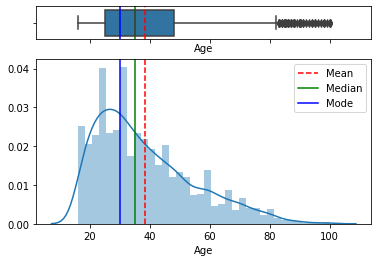

In [13]:
#Graphics
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

x = TanzaniaMobMon["Age"]

sns.boxplot(x, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(x, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='Age')
ax_hist.set(xlabel='Age')

plt.show()

# 3.	Create appropriate graphs to visually represent the relationship between financial services accessed and age, gender, marital status, land ownership and type of income

In [14]:
#Initializing
age = TanzaniaMobMon["Age"]
gender = TanzaniaMobMon["Gender"]
marital_status = TanzaniaMobMon["Marital status"]
highest_education = TanzaniaMobMon["Highest level of education completed"]
land_ownership = TanzaniaMobMon["Form of land ownership"]
mobile_ownership = TanzaniaMobMon["Mobile phone ownership"]
financial_access = TanzaniaMobMon['mobile_money_classification']

sal = TanzaniaMobMon['Salaries/wages']
trad = TanzaniaMobMon['Money from trading/selling']
serv = TanzaniaMobMon['Money from providing a service']
occ = TanzaniaMobMon['Occasional Jobs']
rent = TanzaniaMobMon['Rental income']
intr = TanzaniaMobMon['Interest from savings, investments']
pens = TanzaniaMobMon['Pension']
soci = TanzaniaMobMon['Social welfare money']
rely = TanzaniaMobMon['Rely on someone else to send money']
els =TanzaniaMobMon['Someone else pays expenses']
othr = TanzaniaMobMon['Other']

#salary = len(TanzaniaMobMon[TanzaniaMobMon['Salaries/wages']==1])

#plt.bar(salary,labels='salary')
#plt.show()

data = {
    'Salaries/wages':sal, 
    'Money from trading/selling':trad,
    'Money from providing a service' :serv,
    'Occasional Jobs' :occ,
    'Rental income' :rent,
    'Interest from savings, investments' :intr,
    'Pension' :pens,
    'Social welfare money' :soci,
    'Rely on someone else to send money' :rely,
    'Someone else pays expenses' :els,
    'Other' :othr }

type_of_income = pd.DataFrame(data)

type_of_income





,Salaries/wages,Money from trading/selling,Money from providing a service,Occasional Jobs,Rental income,"Interest from savings, investments",Pension,Social welfare money,Rely on someone else to send money,Someone else pays expenses,Other
0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7089,0,1,0,0,0,0,0,0,1,0,0
7090,0,1,0,0,0,0,0,0,0,0,0
7091,0,1,0,1,0,0,0,0,0,0,0
7092,0,1,0,1,0,0,0,0,0,0,0


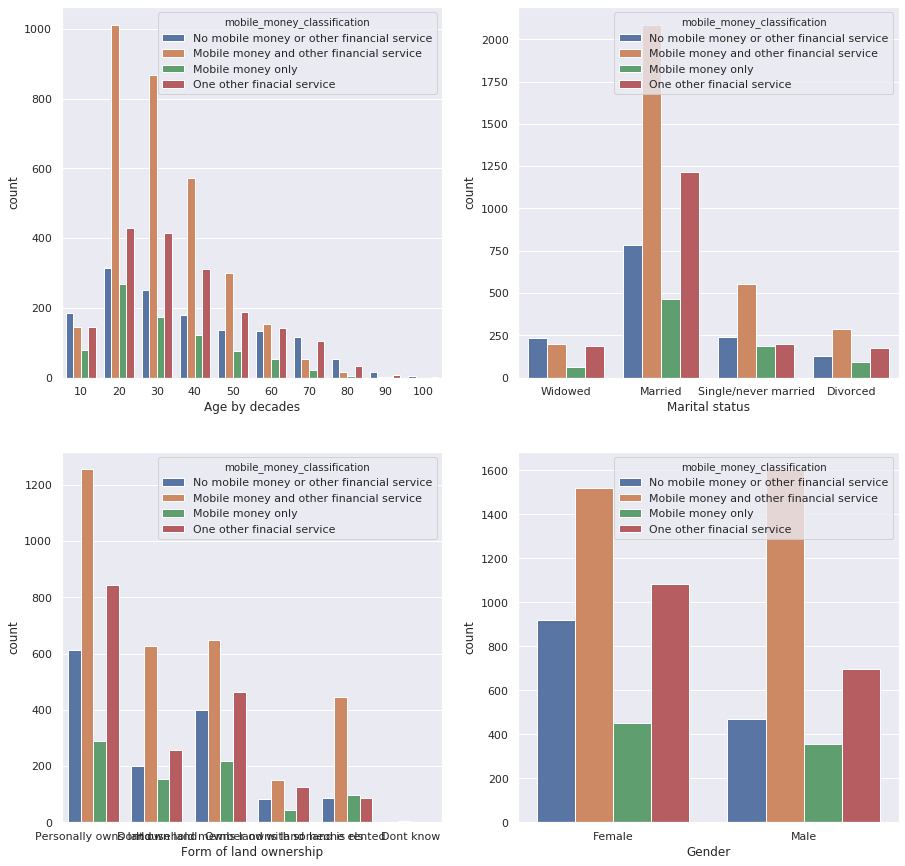

In [15]:
#3.1.Financial services accessed vs age
#3.2 Financial services accessed vs gender
#3.3 Financial services accessed vs marital status
#3.4 Financial services accessed vs land ownership
#3.5 Financial services accessed vs type of income

sns.set()
TanzaniaMobMon['Age by decades'] = TanzaniaMobMon['Age'].apply(lambda x : int(x/10)* 10)
ages = TanzaniaMobMon['Age by decades']

fig, axes = plt.subplots(2,2, figsize=(15, 15))
sns.countplot(x = ages, hue = 'mobile_money_classification', ax=axes[0, 0], data = TanzaniaMobMon)
sns.countplot(x = marital_status, hue = 'mobile_money_classification', ax=axes[0, 1], data = TanzaniaMobMon)
sns.countplot(x = land_ownership, hue = 'mobile_money_classification', ax=axes[1, 0], data = TanzaniaMobMon)
sns.countplot(x = gender, hue = 'mobile_money_classification', ax=axes[1, 1], data = TanzaniaMobMon)


Males use mobile money more than females.

More young people use mobile money than elders

Married people use mobile money the most

People that do have land ownership use have the highest count of usage of Mobile money and other financial service, and those who do have land have the lowest percentage and do not use mobile money also.


## 4.	Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income


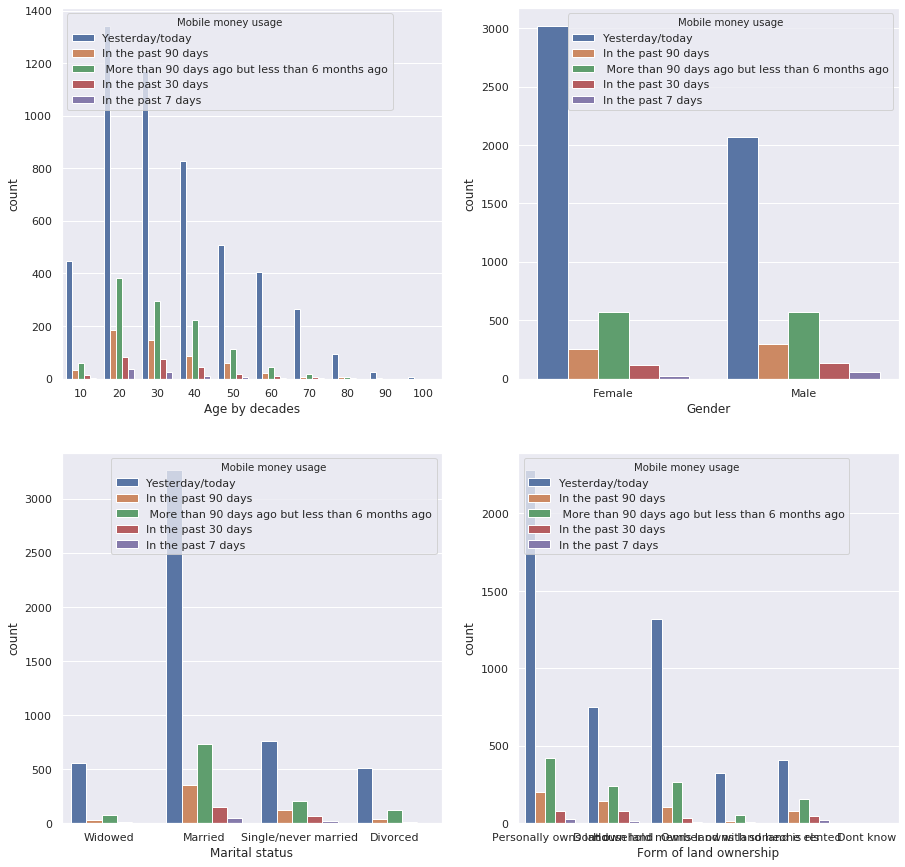

In [33]:
#4.1. how often mobile services are used vs age
#4.2. how often mobile services are used vs gender
#4.3. how often mobile services are used vs marital status
#4.4. how often mobile services are used vs land ownership
#4.5. how often mobile services are used vs type of income

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.countplot(x = ages, hue = TanzaniaMobMon['Mobile money usage'], ax=axes[0, 0], data = TanzaniaMobMon)
sns.countplot(x = gender, hue = TanzaniaMobMon['Mobile money usage'], ax=axes[0, 1], data = TanzaniaMobMon)
sns.countplot(x = marital_status, hue = TanzaniaMobMon['Mobile money usage'], ax=axes[1, 0], data = TanzaniaMobMon)
sns.countplot(x = land_ownership, hue = TanzaniaMobMon['Mobile money usage'], ax=axes[1, 1], data = TanzaniaMobMon)
#sns.countplot(x = type_of_income, hue = TanzaniaMobMon['Q16'], ax=axes[2, 0], data = TanzaniaMobMon)



Females use mobile services more often than males.

More young people use mobile services more often than elders

Married people use mobile money the most

People that do have land ownership use have the highest count of usage of Mobile money and other financial service, and those who do have land have the lowest percentage and do not use mobile money also.

## 5.	Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income

In [38]:
#initializing
latitude = -6.3728253; 
longitude = 34.8924826
income_map = folium.Map(location = [latitude, longitude], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_map)

# add markers to map
for latitude, longitude, label in zip(TanzaniaMobMon['Latitude'], TanzaniaMobMon['Longitude'], 
                           type_of_income):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_map